In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#실행 후 런타임 다시시작

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
c_adult = pd.read_csv('/content/drive/MyDrive/국민체력 100 빅데이터활용 공모전/dataset/가공/체력평가데이터_성인')

In [ ]:
c_adult = c_adult[[ 'ITEM_F007', 'ITEM_F019', 'ITEM_F020', 'ITEM_F012', 'ITEM_F021', 'ITEM_F022', 'CERT_GBN']]
# 악력(근력)    윗몸일으키기(근지구력)    트레드밀/스텝검사)심폐지구력    윗몸 앞으로 굽히기(유연성)    반응시간(민첩성)    제자리멀리뛰기(순발력)
c_adult

,ITEM_F007,ITEM_F019,ITEM_F020,ITEM_F012,ITEM_F021,ITEM_F022,CERT_GBN
0,24.1,18.0,16.0,17.3,14.79,128.0,3등급
1,28.1,24.0,NaN,16.4,13.56,156.0,3등급
2,31.1,41.0,NaN,-3.3,11.20,188.0,참가증
3,16.3,16.0,NaN,8.3,14.59,123.0,참가증
4,21.5,10.0,11.0,20.2,20.10,75.0,3등급
...,...,...,...,...,...,...,...
474080,28.2,49.0,NaN,14.8,NaN,173.0,3등급
474081,28.8,31.0,NaN,15.6,NaN,183.0,참가증
474082,45.0,46.0,NaN,13.0,NaN,216.0,3등급
474083,40.4,49.0,NaN,14.0,NaN,230.0,3등급


In [ ]:
c_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474085 entries, 0 to 474084
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ITEM_F007  473353 non-null  float64
 1   ITEM_F019  469938 non-null  float64
 2   ITEM_F020  298344 non-null  float64
 3   ITEM_F012  472985 non-null  float64
 4   ITEM_F021  414004 non-null  float64
 5   ITEM_F022  463350 non-null  float64
 6   CERT_GBN   474083 non-null  object 
dtypes: float64(6), object(1)
memory usage: 25.3+ MB


In [ ]:
## 결측치가 있는 값들 제거 후 29만개의 데이터를 바탕으로 시각화
c_adult = c_adult.dropna(axis=0)

In [ ]:
c_adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294027 entries, 0 to 473651
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ITEM_F007  294027 non-null  float64
 1   ITEM_F019  294027 non-null  float64
 2   ITEM_F020  294027 non-null  float64
 3   ITEM_F012  294027 non-null  float64
 4   ITEM_F021  294027 non-null  float64
 5   ITEM_F022  294027 non-null  float64
 6   CERT_GBN   294027 non-null  object 
dtypes: float64(6), object(1)
memory usage: 17.9+ MB


In [ ]:
## 0 값을 nan으로 대체후 평균으로 대체
c_adult = c_adult.replace(0, np.NaN)
c_adult = c_adult.fillna(c_adult.mean())

In [ ]:
c_adult = c_adult.reset_index()
c_adult = c_adult.drop(['index'], axis =1)
c_adult

,ITEM_F007,ITEM_F019,ITEM_F020,ITEM_F012,ITEM_F021,ITEM_F022,CERT_GBN
0,24.1,18.00000,16.000000,17.300000,14.790000,128.000000,3등급
1,21.5,10.00000,11.000000,20.200000,20.100000,75.000000,3등급
2,44.2,32.00000,23.000000,0.700000,13.120000,151.000000,참가증
3,35.5,19.00000,19.000000,14.700000,12.720000,174.000000,3등급
4,20.0,20.00000,9.000000,24.800000,18.000000,99.000000,참가증
...,...,...,...,...,...,...,...
294022,18.7,33.00000,30.000000,11.200000,14.800000,137.000000,참가증
294023,17.9,33.54946,30.291433,12.318205,12.788629,171.337112,참가증
294024,41.9,44.00000,24.000000,25.500000,9.870000,239.000000,참가증
294025,25.1,46.00000,30.000000,19.400000,12.030000,173.000000,2등급


In [ ]:
c_rate = c_adult['CERT_GBN']

In [ ]:
df = c_adult.drop(['CERT_GBN'], axis = 1)
df

,ITEM_F007,ITEM_F019,ITEM_F020,ITEM_F012,ITEM_F021,ITEM_F022
0,24.1,18.00000,16.000000,17.300000,14.790000,128.000000
1,21.5,10.00000,11.000000,20.200000,20.100000,75.000000
2,44.2,32.00000,23.000000,0.700000,13.120000,151.000000
3,35.5,19.00000,19.000000,14.700000,12.720000,174.000000
4,20.0,20.00000,9.000000,24.800000,18.000000,99.000000
...,...,...,...,...,...,...
294022,18.7,33.00000,30.000000,11.200000,14.800000,137.000000
294023,17.9,33.54946,30.291433,12.318205,12.788629,171.337112
294024,41.9,44.00000,24.000000,25.500000,9.870000,239.000000
294025,25.1,46.00000,30.000000,19.400000,12.030000,173.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df) 
df=pd.DataFrame(df,columns=['ITEM_F007', 'ITEM_F019', 'ITEM_F020', 'ITEM_F012', 'ITEM_F021', 'ITEM_F022'])
df

,ITEM_F007,ITEM_F019,ITEM_F020,ITEM_F012,ITEM_F021,ITEM_F022
0,-0.285335,-0.995206,-0.732815,5.225660e-01,4.543522e-01,-9.793286e-01
1,-0.377329,-1.507227,-0.989198,8.267618e-01,1.659831e+00,-2.177018e+00
2,0.425855,-0.099169,-0.373880,-1.218693e+00,7.522796e-02,-4.595764e-01
3,0.118026,-0.931203,-0.578986,2.498386e-01,-1.558025e-02,6.017572e-02
4,-0.430403,-0.867201,-1.091751,1.309279e+00,1.183088e+00,-1.634668e+00
...,...,...,...,...,...,...
294022,-0.476400,-0.035167,-0.014944,-1.172943e-01,4.566225e-01,-7.759473e-01
294023,-0.504706,0.000000,0.000000,1.546549e-14,1.209808e-14,1.284543e-15
294024,0.344475,0.668862,-0.322603,1.382706e+00,-6.625888e-01,1.529041e+00
294025,-0.249952,0.796867,-0.014944,7.428457e-01,-1.722244e-01,3.757780e-02


In [ ]:
df = pd.concat([df, c_rate], axis = 1)
df

,ITEM_F007,ITEM_F019,ITEM_F020,ITEM_F012,ITEM_F021,ITEM_F022,CERT_GBN
0,-0.285335,-0.995206,-0.732815,5.225660e-01,4.543522e-01,-9.793286e-01,3등급
1,-0.377329,-1.507227,-0.989198,8.267618e-01,1.659831e+00,-2.177018e+00,3등급
2,0.425855,-0.099169,-0.373880,-1.218693e+00,7.522796e-02,-4.595764e-01,참가증
3,0.118026,-0.931203,-0.578986,2.498386e-01,-1.558025e-02,6.017572e-02,3등급
4,-0.430403,-0.867201,-1.091751,1.309279e+00,1.183088e+00,-1.634668e+00,참가증
...,...,...,...,...,...,...,...
294022,-0.476400,-0.035167,-0.014944,-1.172943e-01,4.566225e-01,-7.759473e-01,참가증
294023,-0.504706,0.000000,0.000000,1.546549e-14,1.209808e-14,1.284543e-15,참가증
294024,0.344475,0.668862,-0.322603,1.382706e+00,-6.625888e-01,1.529041e+00,참가증
294025,-0.249952,0.796867,-0.014944,7.428457e-01,-1.722244e-01,3.757780e-02,2등급


In [ ]:
df_c = df['CERT_GBN']
df_c

0         3등급
1         3등급
2         참가증
3         3등급
4         참가증
         ... 
294022    참가증
294023    참가증
294024    참가증
294025    2등급
294026    3등급
Name: CERT_GBN, Length: 294027, dtype: object

In [ ]:
df = df.drop(['CERT_GBN'], axis = 1)
df

,ITEM_F007,ITEM_F019,ITEM_F020,ITEM_F012,ITEM_F021,ITEM_F022
0,-0.285335,-0.995206,-0.732815,5.225660e-01,4.543522e-01,-9.793286e-01
1,-0.377329,-1.507227,-0.989198,8.267618e-01,1.659831e+00,-2.177018e+00
2,0.425855,-0.099169,-0.373880,-1.218693e+00,7.522796e-02,-4.595764e-01
3,0.118026,-0.931203,-0.578986,2.498386e-01,-1.558025e-02,6.017572e-02
4,-0.430403,-0.867201,-1.091751,1.309279e+00,1.183088e+00,-1.634668e+00
...,...,...,...,...,...,...
294022,-0.476400,-0.035167,-0.014944,-1.172943e-01,4.566225e-01,-7.759473e-01
294023,-0.504706,0.000000,0.000000,1.546549e-14,1.209808e-14,1.284543e-15
294024,0.344475,0.668862,-0.322603,1.382706e+00,-6.625888e-01,1.529041e+00
294025,-0.249952,0.796867,-0.014944,7.428457e-01,-1.722244e-01,3.757780e-02


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=0, n_components=2,perplexity = 50, early_exaggeration = 15, learning_rate = 600)

In [ ]:
tsne_results = tsne.fit_transform(df)
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
tsne_results

,tsne1,tsne2
0,8.954443,-8.111729
1,23.290524,-48.103924
2,2.070564,-41.705486
3,25.107351,4.507052
4,19.726110,-39.987659
...,...,...
294022,42.715401,15.220715
294023,40.158642,-10.089615
294024,-26.655159,7.091550
294025,7.992866,0.131932


In [ ]:
sne = pd.concat([tsne_results, df_c], axis = 1)
sne

,tsne1,tsne2,CERT_GBN
0,8.954443,-8.111729,3등급
1,23.290524,-48.103924,3등급
2,2.070564,-41.705486,참가증
3,25.107351,4.507052,3등급
4,19.726110,-39.987659,참가증
...,...,...,...
294022,42.715401,15.220715,참가증
294023,40.158642,-10.089615,참가증
294024,-26.655159,7.091550,참가증
294025,7.992866,0.131932,2등급


In [ ]:
sne.to_csv('/content/drive/MyDrive/국민체력 100 빅데이터활용 공모전/sne data/sne_adult.csv')

In [ ]:
sne = pd.read_csv('/content/drive/MyDrive/국민체력 100 빅데이터활용 공모전/sne data/sne_adult.csv')

In [ ]:
sne_1 = sne[sne['CERT_GBN'] == '1등급']
sne_2 = sne[sne['CERT_GBN'] == '2등급']
sne_3 = sne[sne['CERT_GBN'] == '3등급']
sne_c = sne[sne['CERT_GBN'] == '참가증']

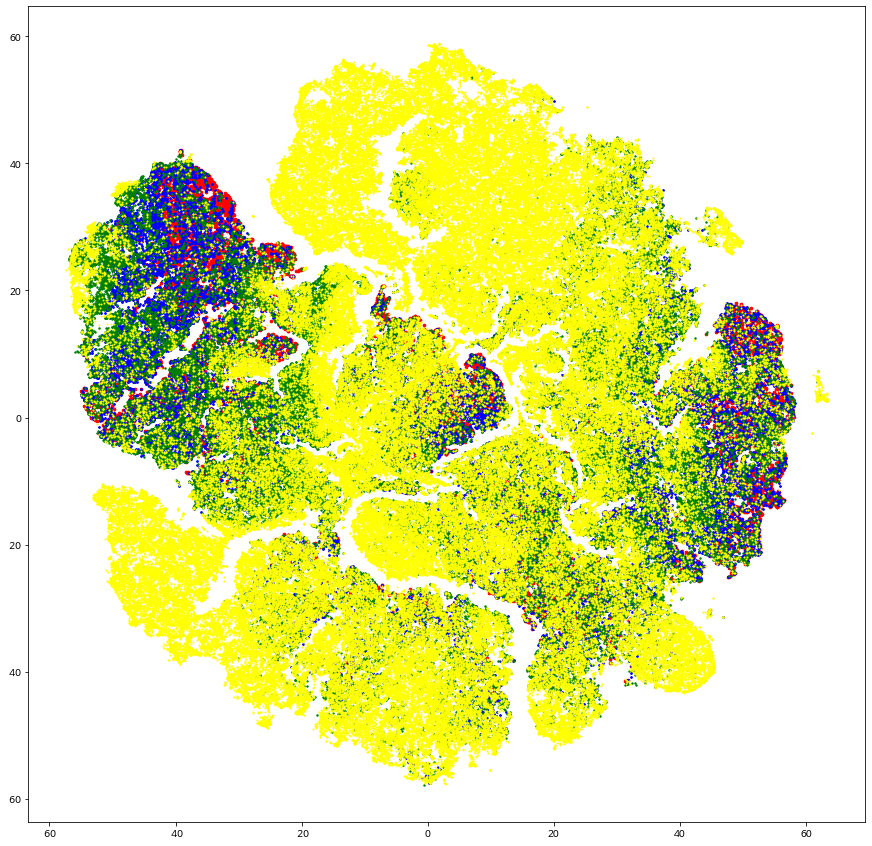

In [ ]:
plt.figure(1, figsize=(15, 15))
plt.scatter(sne_1['tsne1'], sne_1['tsne2'], color='red', s=7)
plt.scatter(sne_2['tsne1'], sne_2['tsne2'], color='blue', s=3)
plt.scatter(sne_3['tsne1'], sne_3['tsne2'], color='green', s=2)
plt.scatter(sne_c['tsne1'], sne_c['tsne2'], color='yellow', s=1)
plt.savefig('/content/drive/MyDrive/국민체력 100 빅데이터활용 공모전/이미지/성인_뇌')
plt.show()